In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import zscore
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")



## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
coffee_df = pd.read_excel("Data/Coffee_Shop_Sales.xlsx")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
coffee_df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
coffee_df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [6]:
coffee_df.describe(include=object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [7]:
coffee_df.shape

(149116, 11)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [8]:
#

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [9]:
#

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [10]:
#

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [11]:
coffee_df['product_id'].value_counts()

product_id
71    3076
50    3053
59    3029
54    3026
29    3013
      ... 
7      146
14     142
10     134
18     122
19     118
Name: count, Length: 80, dtype: int64

In [12]:
coffee_df.columns


Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [13]:
coffee_df['product_category'].value_counts()


product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [14]:
coffee_df[coffee_df['product_category'] == 'Coffee']


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
...,...,...,...,...,...,...,...,...,...,...,...
149103,149444,2023-06-30,19:51:59,2,3,Astoria,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg
149104,149445,2023-06-30,19:52:28,2,3,Astoria,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm
149105,149446,2023-06-30,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg


In [15]:
coffee_df[coffee_df['product_category'] == 'Coffee']['product_type'].value_counts()


product_type
Gourmet brewed coffee    16912
Barista Espresso         16403
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

In [16]:
coffee_df[coffee_df['product_category'] == 'Coffee']['product_id'].value_counts()


product_id
29    3013
38    2990
22    2919
36    2911
26    2904
39    2896
23    2894
32    2866
31    2833
25    2814
40    2793
41    2772
27    2771
33    2741
30    2731
37    2730
28    2728
24    2664
34    2630
35    2594
87    2222
Name: count, dtype: int64

In [17]:
coffee_df[coffee_df['product_category'] == 'Coffee']['product_type'].value_counts()


product_type
Gourmet brewed coffee    16912
Barista Espresso         16403
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

In [18]:
coffee_df[coffee_df['product_type'] == 'Gourmet brewed coffee']['product_detail'].value_counts()


product_detail
Columbian Medium Roast Rg    3013
Ethiopia Rg                  2866
Ethiopia Sm                  2833
Ethiopia Lg                  2741
Columbian Medium Roast Lg    2731
Columbian Medium Roast Sm    2728
Name: count, dtype: int64

In [19]:
coffee_df[coffee_df['product_type'] == 'Barista Espresso']['product_detail'].value_counts()


product_detail
Latte                   2990
Latte Rg                2896
Cappuccino              2793
Cappuccino Lg           2772
Espresso shot           2730
Ouro Brasileiro shot    2222
Name: count, dtype: int64

In [20]:
coffee_df[coffee_df['product_type'] == 'Organic brewed coffee']['product_detail'].value_counts()


product_detail
Brazilian Rg    2904
Brazilian Sm    2814
Brazilian Lg    2771
Name: count, dtype: int64

In [21]:
coffee_df[coffee_df['product_type'] == 'Drip coffee']['product_detail'].value_counts()


product_detail
Our Old Time Diner Blend Sm    2919
Our Old Time Diner Blend Rg    2894
Our Old Time Diner Blend Lg    2664
Name: count, dtype: int64

In [22]:
coffee_df[coffee_df['product_type'] == 'Premium brewed coffee']['product_detail'].value_counts()


product_detail
Jamaican Coffee River Lg    2911
Jamaican Coffee River Sm    2630
Jamaican Coffee River Rg    2594
Name: count, dtype: int64

In [23]:
coffee_df[coffee_df['product_category'] == 'Coffee']['product_detail'].value_counts()


product_detail
Columbian Medium Roast Rg      3013
Latte                          2990
Our Old Time Diner Blend Sm    2919
Jamaican Coffee River Lg       2911
Brazilian Rg                   2904
Latte Rg                       2896
Our Old Time Diner Blend Rg    2894
Ethiopia Rg                    2866
Ethiopia Sm                    2833
Brazilian Sm                   2814
Cappuccino                     2793
Cappuccino Lg                  2772
Brazilian Lg                   2771
Ethiopia Lg                    2741
Columbian Medium Roast Lg      2731
Espresso shot                  2730
Columbian Medium Roast Sm      2728
Our Old Time Diner Blend Lg    2664
Jamaican Coffee River Sm       2630
Jamaican Coffee River Rg       2594
Ouro Brasileiro shot           2222
Name: count, dtype: int64

In [24]:
coffee_df[coffee_df['product_category'] == 'Tea']


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
10,11,2023-01-01,07:43:05,1,5,Lower Manhattan,56,2.55,Tea,Brewed Chai tea,Spicy Eye Opener Chai Rg
12,13,2023-01-01,07:45:51,1,5,Lower Manhattan,51,3.00,Tea,Brewed Black tea,Earl Grey Lg
13,14,2023-01-01,07:48:19,1,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149109,149450,2023-06-30,20:08:38,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg
149110,149451,2023-06-30,20:16:31,2,5,Lower Manhattan,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg


In [25]:
coffee_df[coffee_df['product_category'] == 'Tea']['product_type'].value_counts()


product_type
Brewed Chai tea      17183
Brewed Black tea     11350
Brewed herbal tea    11245
Brewed Green tea      5671
Name: count, dtype: int64

In [26]:
coffee_df[coffee_df['product_category'] == 'Tea']['product_id'].value_counts()


product_id
50    3053
54    3026
52    2955
57    2951
44    2949
46    2921
45    2857
49    2852
55    2830
42    2792
47    2750
48    2743
53    2716
56    2705
51    2702
43    2647
Name: count, dtype: int64

In [27]:
coffee_df[coffee_df['product_category'] == 'Tea']['product_detail'].value_counts()


product_detail
Earl Grey Rg                 3053
Morning Sunrise Chai Rg      3026
Traditional Blend Chai Rg    2955
Spicy Eye Opener Chai Lg     2951
Peppermint Rg                2949
Serenity Green Tea Rg        2921
Peppermint Lg                2857
English Breakfast Lg         2852
Morning Sunrise Chai Lg      2830
Lemon Grass Rg               2792
Serenity Green Tea Lg        2750
English Breakfast Rg         2743
Traditional Blend Chai Lg    2716
Spicy Eye Opener Chai Rg     2705
Earl Grey Lg                 2702
Lemon Grass Lg               2647
Name: count, dtype: int64

In [28]:
coffee_df[coffee_df['product_category'] == 'Bakery']

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
16,17,2023-01-01,07:59:58,1,5,Lower Manhattan,79,3.75,Bakery,Scone,Jumbo Savory Scone
22,23,2023-01-01,08:24:26,1,5,Lower Manhattan,69,3.25,Bakery,Biscotti,Hazelnut Biscotti
26,27,2023-01-01,08:33:08,1,5,Lower Manhattan,76,3.50,Bakery,Biscotti,Chocolate Chip Biscotti
28,29,2023-01-01,08:35:03,1,5,Lower Manhattan,71,3.75,Bakery,Pastry,Chocolate Croissant
...,...,...,...,...,...,...,...,...,...,...,...
149063,149404,2023-06-30,18:49:29,1,3,Astoria,79,3.75,Bakery,Scone,Jumbo Savory Scone
149093,149434,2023-06-30,19:39:19,1,8,Hell's Kitchen,72,3.25,Bakery,Scone,Ginger Scone
149096,149437,2023-06-30,19:44:46,2,3,Astoria,72,3.25,Bakery,Scone,Ginger Scone
149101,149442,2023-06-30,19:46:28,1,8,Hell's Kitchen,75,3.50,Bakery,Pastry,Croissant


In [29]:
coffee_df[coffee_df['product_category'] == 'Bakery']['product_type'].value_counts()

product_type
Scone       10173
Pastry       6912
Biscotti     5711
Name: count, dtype: int64

In [30]:
coffee_df[coffee_df['product_category'] == 'Bakery']['product_id'].value_counts()


product_id
71    3076
72    2324
70    2077
69    2009
79    2008
78    1952
75    1933
73    1903
76    1891
77    1812
74    1811
Name: count, dtype: int64

In [31]:
coffee_df[coffee_df['product_category'] == 'Bakery']['product_detail'].value_counts()


product_detail
Chocolate Croissant        3076
Ginger Scone               2324
Cranberry Scone            2077
Hazelnut Biscotti          2009
Jumbo Savory Scone         2008
Scottish Cream Scone       1952
Croissant                  1933
Almond Croissant           1903
Chocolate Chip Biscotti    1891
Oatmeal Scone              1812
Ginger Biscotti            1811
Name: count, dtype: int64

In [32]:
coffee_df[coffee_df['product_category'] == 'Drinking Chocolate']

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg
18,19,2023-01-01,08:00:39,2,8,Hell's Kitchen,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
19,20,2023-01-01,08:11:45,1,8,Hell's Kitchen,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
41,42,2023-01-01,09:10:30,2,5,Lower Manhattan,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg
...,...,...,...,...,...,...,...,...,...,...,...
149060,149401,2023-06-30,18:44:49,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
149071,149412,2023-06-30,19:04:03,2,8,Hell's Kitchen,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg
149075,149416,2023-06-30,19:10:03,2,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
149094,149435,2023-06-30,19:40:09,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [33]:
coffee_df[coffee_df['product_category'] == 'Drinking Chocolate']['product_type'].value_counts()

product_type
Hot chocolate    11468
Name: count, dtype: int64

In [34]:
coffee_df[coffee_df['product_category'] == 'Drinking Chocolate']['product_id'].value_counts()


product_id
59    3029
61    2961
60    2842
58    2636
Name: count, dtype: int64

In [35]:
coffee_df[coffee_df['product_category'] == 'Drinking Chocolate']['product_detail'].value_counts()


product_detail
Dark chocolate Lg               3029
Sustainably Grown Organic Lg    2961
Sustainably Grown Organic Rg    2842
Dark chocolate Rg               2636
Name: count, dtype: int64

In [36]:
coffee_df[coffee_df['product_category'] == 'Flavours'] #IDK IF WE WILL DELETE IT OR NOT

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
3254,3284,2023-01-07,06:27:23,2,5,Lower Manhattan,64,0.8,Flavours,Regular syrup,Hazelnut syrup
3291,3321,2023-01-07,07:44:17,1,5,Lower Manhattan,63,0.8,Flavours,Regular syrup,Carmel syrup
3318,3348,2023-01-07,08:09:37,1,8,Hell's Kitchen,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup
3325,3355,2023-01-07,08:18:07,1,5,Lower Manhattan,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup
3331,3361,2023-01-07,08:20:30,1,5,Lower Manhattan,64,0.8,Flavours,Regular syrup,Hazelnut syrup
...,...,...,...,...,...,...,...,...,...,...,...
148994,149335,2023-06-30,17:33:45,1,8,Hell's Kitchen,63,0.8,Flavours,Regular syrup,Carmel syrup
149013,149354,2023-06-30,17:59:31,2,5,Lower Manhattan,63,0.8,Flavours,Regular syrup,Carmel syrup
149031,149372,2023-06-30,18:11:40,1,3,Astoria,84,0.8,Flavours,Regular syrup,Chocolate syrup
149059,149400,2023-06-30,18:44:37,2,3,Astoria,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup


In [37]:
coffee_df[coffee_df['product_category'] == 'Coffee beans'] #IDK IF WE WILL DELETE IT OR NOT

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
3293,3323,2023-01-07,07:44:17,1,5,Lower Manhattan,6,21.00,Coffee beans,Gourmet Beans,Ethiopia
3296,3326,2023-01-07,07:45:15,1,5,Lower Manhattan,9,28.00,Coffee beans,Organic Beans,Organic Decaf Blend
3302,3332,2023-01-07,07:50:42,1,5,Lower Manhattan,9,28.00,Coffee beans,Organic Beans,Organic Decaf Blend
3408,3438,2023-01-07,09:05:19,1,5,Lower Manhattan,9,28.00,Coffee beans,Organic Beans,Organic Decaf Blend
3447,3477,2023-01-07,09:42:52,1,5,Lower Manhattan,7,19.75,Coffee beans,Premium Beans,Jamacian Coffee River
...,...,...,...,...,...,...,...,...,...,...,...
148739,149080,2023-06-30,11:42:44,1,5,Lower Manhattan,2,18.00,Coffee beans,House blend Beans,Our Old Time Diner Blend
148784,149125,2023-06-30,13:03:56,1,5,Lower Manhattan,8,45.00,Coffee beans,Premium Beans,Civet Cat
148927,149268,2023-06-30,15:59:13,1,3,Astoria,7,19.75,Coffee beans,Premium Beans,Jamacian Coffee River
149064,149405,2023-06-30,18:49:29,1,3,Astoria,3,14.75,Coffee beans,Espresso Beans,Espresso Roast


In [38]:
coffee_df[coffee_df['product_category'] == 'Loose Tea'] #IDK IF WE WILL DELETE IT OR NOT

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
3263,3293,2023-01-07,07:07:56,1,5,Lower Manhattan,12,8.95,Loose Tea,Herbal tea,Peppermint
3481,3511,2023-01-07,10:10:10,1,8,Hell's Kitchen,17,9.50,Loose Tea,Chai tea,Morning Sunrise Chai
3880,3910,2023-01-08,08:13:57,1,3,Astoria,15,9.25,Loose Tea,Green tea,Serenity Green Tea
3896,3926,2023-01-08,08:26:31,1,8,Hell's Kitchen,16,8.95,Loose Tea,Chai tea,Traditional Blend Chai
3982,4012,2023-01-08,09:40:37,1,8,Hell's Kitchen,17,9.50,Loose Tea,Chai tea,Morning Sunrise Chai
...,...,...,...,...,...,...,...,...,...,...,...
148647,148988,2023-06-30,10:47:11,1,3,Astoria,14,8.95,Loose Tea,Black tea,Earl Grey
148659,149000,2023-06-30,10:53:26,1,3,Astoria,18,10.95,Loose Tea,Chai tea,Spicy Eye Opener Chai
148663,149004,2023-06-30,10:54:04,1,5,Lower Manhattan,17,9.50,Loose Tea,Chai tea,Morning Sunrise Chai
148816,149157,2023-06-30,13:45:06,1,5,Lower Manhattan,16,8.95,Loose Tea,Chai tea,Traditional Blend Chai


In [39]:
coffee_df[coffee_df['product_category'] == 'Packaged Chocolate'] #IDK IF WE WILL DELETE IT OR NOT

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
3440,3470,2023-01-07,09:31:57,1,5,Lower Manhattan,19,6.40,Packaged Chocolate,Drinking Chocolate,Dark chocolate
3630,3660,2023-01-07,12:26:42,1,8,Hell's Kitchen,19,6.40,Packaged Chocolate,Drinking Chocolate,Dark chocolate
4022,4052,2023-01-08,10:12:05,1,8,Hell's Kitchen,20,7.60,Packaged Chocolate,Organic Chocolate,Sustainably Grown Organic
4257,4287,2023-01-08,16:12:35,1,8,Hell's Kitchen,21,13.33,Packaged Chocolate,Drinking Chocolate,Chili Mayan
4431,4461,2023-01-09,07:38:22,1,3,Astoria,20,7.60,Packaged Chocolate,Organic Chocolate,Sustainably Grown Organic
...,...,...,...,...,...,...,...,...,...,...,...
148606,148947,2023-06-30,10:32:41,1,8,Hell's Kitchen,21,13.33,Packaged Chocolate,Drinking Chocolate,Chili Mayan
148708,149049,2023-06-30,11:21:29,1,8,Hell's Kitchen,19,6.40,Packaged Chocolate,Drinking Chocolate,Dark chocolate
148771,149112,2023-06-30,12:43:17,1,8,Hell's Kitchen,20,7.60,Packaged Chocolate,Organic Chocolate,Sustainably Grown Organic
148796,149137,2023-06-30,13:13:13,1,8,Hell's Kitchen,20,7.60,Packaged Chocolate,Organic Chocolate,Sustainably Grown Organic


In [40]:
coffee_df[coffee_df['product_category'] == 'Branded'] #Out of scope i will delete it

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
4033,4063,2023-01-08,10:22:32,1,5,Lower Manhattan,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
4359,4389,2023-01-08,19:54:56,1,3,Astoria,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
4466,4496,2023-01-09,08:02:30,1,5,Lower Manhattan,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
4594,4624,2023-01-09,09:40:56,1,5,Lower Manhattan,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
4598,4628,2023-01-09,09:42:16,1,5,Lower Manhattan,81,28.0,Branded,Clothing,I Need My Bean! T-shirt
...,...,...,...,...,...,...,...,...,...,...,...
148248,148589,2023-06-30,08:23:59,1,3,Astoria,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
148405,148746,2023-06-30,09:25:42,1,5,Lower Manhattan,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
148537,148878,2023-06-30,10:14:36,2,5,Lower Manhattan,83,14.0,Branded,Housewares,I Need My Bean! Latte cup
148562,148903,2023-06-30,10:22:32,1,5,Lower Manhattan,83,14.0,Branded,Housewares,I Need My Bean! Latte cup


In [41]:
#out of our scope
coffee_df = coffee_df[coffee_df['product_category'] != 'Flavours']

In [42]:
#out of our scope
coffee_df = coffee_df[coffee_df['product_category'] != 'Coffee beans']

In [43]:
#out of our scope
coffee_df = coffee_df[coffee_df['product_category'] != 'Loose Tea']

In [44]:
#out of our scope
coffee_df = coffee_df[coffee_df['product_category'] != 'Packaged Chocolate']

In [45]:
#out of our scope
coffee_df = coffee_df[coffee_df['product_category'] != 'Branded']

In [46]:
coffee_df.shape

(138129, 11)

In [47]:
coffee_df['store_location'].value_counts()

store_location
Astoria            47874
Hell's Kitchen     46844
Lower Manhattan    43411
Name: count, dtype: int64

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [48]:
coffee_df.duplicated().sum()

0

In [49]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [50]:
#Display number missing values per column

In [51]:
coffee_df.isnull().sum().sort_values(ascending = False)

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [52]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [53]:
# check columns types 

In [54]:
coffee_df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [55]:
# go to clean them 

In [56]:
# check outliers 

#### Feature Engineering



In [57]:
coffee_df['transaction_datetime'] = pd.to_datetime(
    coffee_df['transaction_date'].astype(str) + ' ' + coffee_df['transaction_time'].astype(str)
)

In [58]:
coffee_df['transaction_datetime']

0        2023-01-01 07:06:11
1        2023-01-01 07:08:56
2        2023-01-01 07:14:04
3        2023-01-01 07:20:24
4        2023-01-01 07:22:41
                 ...        
149110   2023-06-30 20:16:31
149111   2023-06-30 20:18:41
149112   2023-06-30 20:25:10
149113   2023-06-30 20:31:34
149114   2023-06-30 20:57:19
Name: transaction_datetime, Length: 138129, dtype: datetime64[ns]

In [59]:
coffee_df['order_id'] = coffee_df.groupby('transaction_datetime').ngroup() + 1

In [60]:
coffee_df.head(20)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,order_id
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,3
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,4
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,5
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,2023-01-01 07:22:41,5
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:25:49,6
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,2023-01-01 07:33:34,7
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,2023-01-01 07:39:13,8
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,2023-01-01 07:39:34,9


#### Visualization

In [61]:
#sales by hour?
coffee_df['transaction_hour'] = coffee_df['transaction_datetime'].dt.hour

In [129]:
coffee_df[coffee_df['transaction_hour'] == 6]['order_id'].nunique()

3430

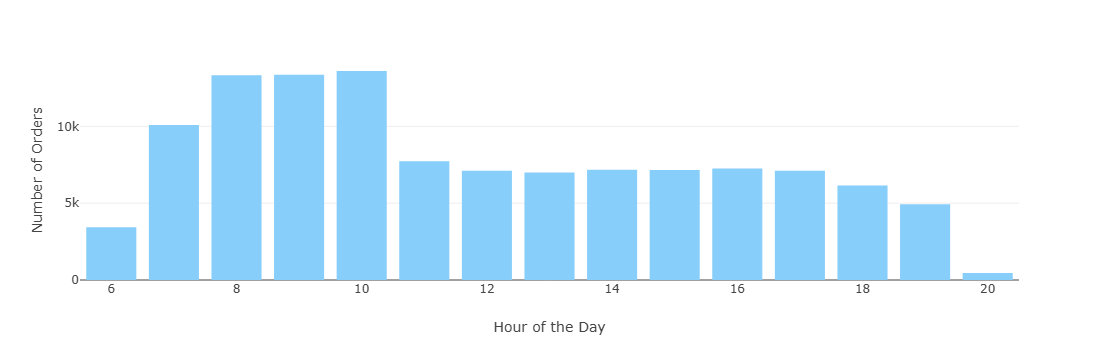

In [125]:
# Create a new DataFrame to count the number of unique orders per hour
orders_per_hour = coffee_df.groupby('transaction_hour')['order_id'].nunique().reset_index()

# Create a histogram visualization for the number of unique orders by hour
import plotly.express as px

fig = px.bar(
    orders_per_hour,
    x='transaction_hour',
    y='order_id',
    # title='Orders Distribution by Hour',
    labels={'transaction_hour': 'Hour of the Day', 'order_id': 'Number of Orders'},
    color_discrete_sequence=['lightskyblue']
)

fig.show()

In [115]:
# fig = px.histogram(
#     coffee_df, 
#     x='transaction_hour', 
#     title='Sales Distrbution By Hour ',
#     nbins=60 ,
#     color_discrete_sequence=['lightskyblue']
# )

# fig.show()

In [63]:
#pairs of items bought together for each order

In [101]:
mask = coffee_df[coffee_df['product_detail'] == 'Chocolate Croissant']

In [108]:
mask['order_id'].duplicated().sum()

241

In [109]:
mask[mask['order_id'].duplicated()]['order_id'].duplicated().sum()


22

In [110]:
from itertools import combinations
from collections import Counter

# Group items by order_id
order_groups = coffee_df.groupby('order_id')['product_id'].apply(list)

# Generate all pairs of items bought together for each order
item_pairs = []
for items in order_groups:
    # Generate all combinations of 2 items in the order
    item_pairs.extend(combinations(sorted(items), 2))

# Count the frequency of each pair
pair_counts = Counter(item_pairs)

# Find the top 2 most frequent item pairs
most_common_pairs = pair_counts.most_common(5)

# Map product IDs to product details
product_details = coffee_df.set_index('product_id')['product_detail'].to_dict()

# Replace product IDs with their details in the most common pairs
most_common_pairs_with_details = [
    (f"{product_details[pair[0]]} & {product_details[pair[1]]}", count)
    for pair, count in most_common_pairs
]

# Convert to DataFrame for visualization
most_common_pairs_details_df = pd.DataFrame(
    most_common_pairs_with_details, columns=["Item Pair (Details)", "Frequency"]
)


In [111]:
most_common_pairs_with_details

[('Ginger Scone & Ouro Brasileiro shot', 723),
 ('Chocolate Croissant & Chocolate Croissant', 263),
 ('Peppermint Rg & Chocolate Croissant', 98),
 ('Serenity Green Tea Lg & Jumbo Savory Scone', 93),
 ('Latte & Croissant', 89)]

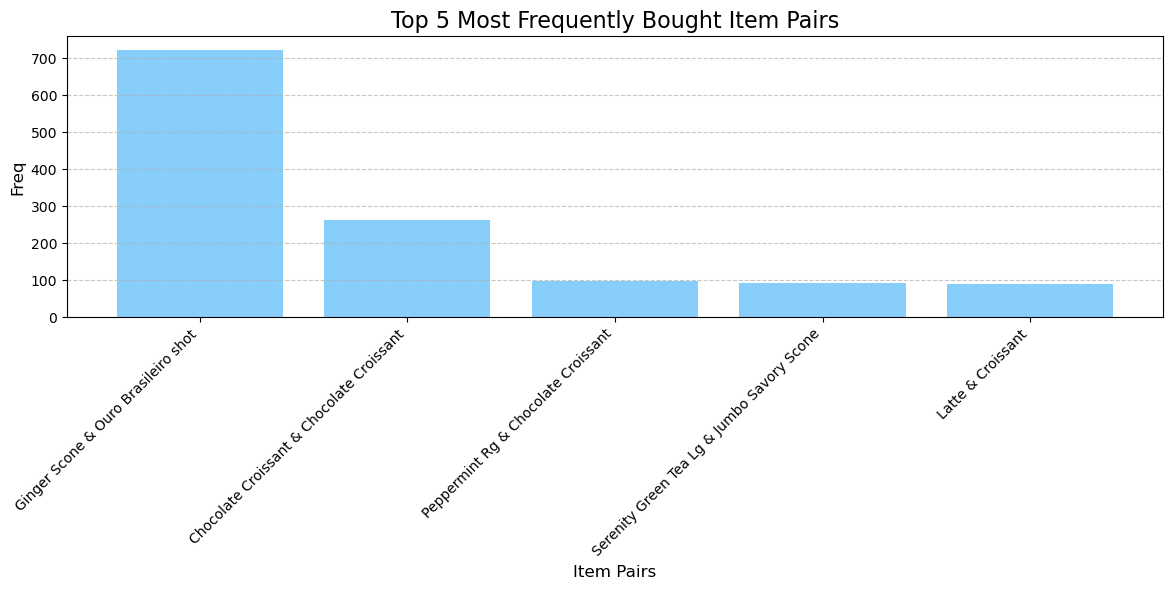

In [68]:
plt.figure(figsize=(12, 6))
plt.bar(
    most_common_pairs_details_df["Item Pair (Details)"],
    most_common_pairs_details_df["Frequency"],
    color="lightskyblue",
)
plt.title("Top 5 Most Frequently Bought Item Pairs", fontsize=16)
plt.xlabel("Item Pairs", fontsize=12)
plt.ylabel("Freq", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [69]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [70]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [71]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [72]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [73]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.